## **Import library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# **Prediksi Udara AQMS Tandes**

## **Preporcessing data**

### **Konversi Data menjadi ISPU**

In [ ]:
url='https://drive.google.com/file/d/1zJVlItGdBGVo5x4jdee2xZsz1jldftiM/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df1 = pd.read_csv(url)

In [ ]:
df1.head()

,Lokasi,Tanggal,X,Y,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Tandes,01/01/2020,"725,891,944","1,126,779,639",19,20,22,3125,84.0,4,0
1,Tandes,02/01/2020,"725,891,944","1,126,779,639",12,13,22,3332,88.0,5,0
2,Tandes,03/01/2020,"725,891,944","1,126,779,639",21,22,24,2922,88.0,4,0
3,Tandes,04/01/2020,"725,891,944","1,126,779,639",13,14,28,2507,77.0,4,0
4,Tandes,05/01/2020,"725,891,944","1,126,779,639",12,12,37,1863,65.0,4,0


In [ ]:
# Tabel baku mutu ISPU
baku_mutu = {
    "PM10": [(0, 50, 50), (50, 150, 100), (150, 350, 200), (350, 420, 300), (420, 500, 400)],
    "PM2.5": [(0, 15.5, 50), (15.5, 55.4, 100), (55.4, 150.4, 200), (150.4, 250.4, 300), (250.4, float('inf'), 400)],
    "SO2": [(0, 52, 50), (52, 180, 100), (180, 400, 200), (400, 800, 300), (800, 1200, 400)],
    "CO": [(0, 4000, 50), (4000, 8000, 100), (8000, 15000, 200), (15000, 30000, 300), (30000, 45000, 400)],
    "O3": [(0, 120, 50), (120, 235, 100), (235, 400, 200), (400, 800, 300), (800, 1000, 400)],
    "NO2": [(0, 80, 50), (80, 200, 100), (200, 400, 200), (400, 800, 300), (800, 1000, 400)],
    "HC": [(0, 45, 50), (45, 100, 100), (100, 215, 200), (215, 432, 300), (432, 648, 400)]
}

def calculate_ispu(value, pollutant):
    for lower_bound, upper_bound, ispu_value in baku_mutu[pollutant]:
        if lower_bound <= value < upper_bound:
            xx = value
            ia = ispu_value
            ib = ispu_value - 50  # ISPU untuk batas bawah
            xa = upper_bound
            xb = lower_bound

            ispu = (ia - ib) / (xa - xb) * (xx - xb) + ib
            return round(ispu, 1)
    return None

# Membuat data_ispu dengan hanya kolom yang diinginkan
df = pd.DataFrame()

# Menambahkan kolom Lokasi dan Tanggal dari df1
df['Lokasi']  = df1['Lokasi']
df['X']  = df1['Y']
df['Y']  = df1['Y']
df['Tanggal'] = df1['Tanggal']

# Mengisi nilai kosong dengan nilai 0
df1 = df1.fillna(0)

# Menghitung ISPU dan menambahkannya ke data_ispu
df['PM10'] = df1['PM10'].apply(lambda x: calculate_ispu(x, 'PM10'))
df['PM2.5'] = df1['PM2.5'].apply(lambda x: calculate_ispu(x, 'PM2.5'))
df['SO2'] = df1['SO2'].apply(lambda x: calculate_ispu(x, 'SO2'))
df['CO'] = df1['CO'].apply(lambda x: calculate_ispu(x, 'CO'))
df['O3'] = df1['O3'].apply(lambda x: calculate_ispu(x, 'O3'))
df['NO2'] = df1['NO2'].apply(lambda x: calculate_ispu(x, 'NO2'))
df['HC'] = df1['HC'].apply(lambda x: calculate_ispu(x, 'HC'))

# Menampilkan data_ispu yang sudah diperbarui
df

,Lokasi,X,Y,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Tandes,"1,126,779,639","1,126,779,639",01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0
1,Tandes,"1,126,779,639","1,126,779,639",02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0
2,Tandes,"1,126,779,639","1,126,779,639",03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0
3,Tandes,"1,126,779,639","1,126,779,639",04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0
4,Tandes,"1,126,779,639","1,126,779,639",05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1803,Tandes,"1,126,779,639","1,126,779,639",8-Dec-24,20.0,48.4,22.1,11.4,0.8,0.0,0.0
1804,Tandes,"1,126,779,639","1,126,779,639",9-Dec-24,17.0,41.9,23.1,12.1,0.8,0.0,0.0
1805,Tandes,"1,126,779,639","1,126,779,639",10-Dec-24,20.0,48.4,25.0,14.1,0.8,0.0,0.0
1806,Tandes,"1,126,779,639","1,126,779,639",11-Dec-24,22.0,51.9,26.9,14.7,0.8,0.0,0.0


### **Membagi Dataset**

In [ ]:
# Memfilter data untuk lokasi "Tandes"
df_tandes = df[df['Lokasi'] == 'Tandes']

# Menghapus kolom "X" dan "Y"
df_tandes = df_tandes.drop(columns=['X', 'Y'])

# Reset index dan drop kolom nomor jika berasal dari CSV
df_tandes = df_tandes.reset_index(drop=True)

# Membagi data menjadi 80% untuk training dan 20% untuk testing berdasarkan indeks
split_index = int(len(df_tandes) * 0.8)
df_training_tandes = df_tandes.iloc[:split_index]
df_testing_tandes = df_tandes.iloc[split_index:]

# Menampilkan informasi dari kedua dataset
print(f"Data Training: {df_training_tandes.shape}")
print(f"Data Testing : {df_testing_tandes.shape}")


Data Training: (1446, 9)
Data Testing : (362, 9)


In [ ]:
df_training_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
0,Tandes,01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0
1,Tandes,02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0
2,Tandes,03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0
3,Tandes,04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0
4,Tandes,05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0


In [ ]:
df_testing_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC
1446,Tandes,17-Dec-23,33.0,85.7,50.0,7.0,11.7,23.8,4.4
1447,Tandes,18-Dec-23,41.0,99.5,50.0,7.0,20.8,23.8,4.4
1448,Tandes,19-Dec-23,34.0,88.2,50.0,7.0,22.9,23.8,4.4
1449,Tandes,20-Dec-23,31.0,83.2,50.0,7.0,20.8,23.8,4.4
1450,Tandes,21-Dec-23,26.0,74.4,50.0,7.0,1.2,23.8,4.4


### **Mengcopy Data set**

In [ ]:
# Memfilter data untuk lokasi "Tandes" dan membuat df_tandes
df_tandes = df_training_tandes[df_training_tandes['Lokasi'] == 'Tandes'].copy()

# Menambahkan kolom "Max" dengan nilai maksimum dari parameter (PM10, PM2.5, SO2, CO, O3, NO2, HC)
parameter_columns = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']
df_tandes['Max'] = df_tandes[parameter_columns].max(axis=1)

# Menambahkan penilaian ISPU berdasarkan nilai "Max"
def ispu_category(value):
    if 1 <= value <= 50:
        return 'Baik'
    elif 51 <= value <= 100:
        return 'Sedang'
    elif 101 <= value <= 150:
        return 'Tidak Sehat'
    elif 151 <= value <= 200:
        return 'Sangat tidak sehat'
    else:
        return 'Berbahaya'

df_tandes['Kategori'] = df_tandes['Max'].apply(ispu_category)

# Membuat df_tandess yang sama dengan df_tandes
df_tandess = df_tandes.copy()

### **df_tandess**

In [ ]:
# Menampilkan hasil
df_tandes.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


### **df_tandess**

In [ ]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


In [ ]:
df_tandess.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
0,Tandes,01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0,55.6,Sedang
1,Tandes,02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0,41.9,Baik
2,Tandes,03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0,58.1,Sedang
3,Tandes,04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0,45.2,Baik
4,Tandes,05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0,38.7,Baik


## **Proses 1 membuat algoritma dengan metode KNN**

In [ ]:
# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Evaluasi hasil prediksi
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.93      0.95      0.94        82
         Berbahaya       1.00      0.41      0.58        17
Sangat tidak sehat       0.86      0.86      0.86         7
            Sedang       0.94      0.98      0.96       184

          accuracy                           0.94       290
         macro avg       0.93      0.80      0.84       290
      weighted avg       0.94      0.94      0.93       290



### **Grafik Line plot jumlah K=n**

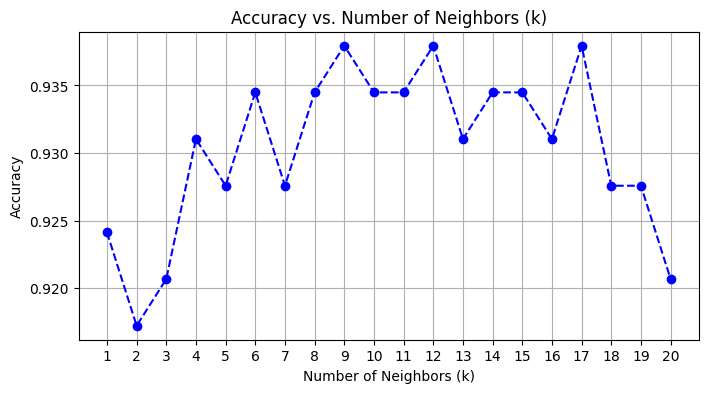

In [ ]:
# Menyimpan akurasi untuk setiap nilai k
k_range = range(1, 21)
accuracies = []

# Menghitung akurasi untuk nilai k yang berbeda
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot akurasi untuk setiap nilai k
plt.figure(figsize=(8, 4))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.show()

## **Proses 2 melakukan Prediksi pada  Data testing**

In [ ]:
# Hapus kolom yang tidak diperlukan pada data testing kolom Nomor
df_testing_tandes = df_testing_tandes.loc[:, ~df_testing_tandes.columns.str.contains('^Nomor')]

# Pilih fitur yang sama dengan data latih
X_new = df_testing_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]

# Standarisasi data baru dengan scaler yang sudah dilatih
X_new_scaled = scaler.transform(X_new)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_new_scaled)

# Menambahkan hasil prediksi ke data baru tanpa menghapus kolom 'Lokasi' dan 'Tanggal'
df_testing_tandes['kategori'] = predictions

# Tampilkan hasil prediksi beserta lokasi dan tanggal
df_tandes_testing_result = df_testing_tandes.reset_index(drop=True)
df_tandes_testing_result.head()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,17-Dec-23,33.0,85.7,50.0,7.0,11.7,23.8,4.4,Sedang
1,Tandes,18-Dec-23,41.0,99.5,50.0,7.0,20.8,23.8,4.4,Sedang
2,Tandes,19-Dec-23,34.0,88.2,50.0,7.0,22.9,23.8,4.4,Sedang
3,Tandes,20-Dec-23,31.0,83.2,50.0,7.0,20.8,23.8,4.4,Sedang
4,Tandes,21-Dec-23,26.0,74.4,50.0,7.0,1.2,23.8,4.4,Sedang


### **Classification report data Testing**

In [ ]:
# Tampilkan classification report
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

              Baik       0.93      0.95      0.94        82
         Berbahaya       1.00      0.41      0.58        17
Sangat tidak sehat       0.86      0.86      0.86         7
            Sedang       0.94      0.98      0.96       184

          accuracy                           0.94       290
         macro avg       0.93      0.80      0.84       290
      weighted avg       0.94      0.94      0.93       290



### **Menggabungkan kolom data training dan hasil prediksi data testing**

In [ ]:
# Hapus kolom yang tidak diperlukan dari df_tandess
df_tandess = df_tandess.drop(columns=['Max'], errors='ignore')

# Gabungkan df_tandess dan df_tandes_testing_result
df_tandes_combine = pd.concat([df_tandess, df_tandes_testing_result], ignore_index=True)

# Ganti NaN di 'Kategori' dengan nilai dari 'kategori'
df_tandes_combine['Kategori'] = df_tandes_combine['Kategori'].fillna(df_tandes_combine['kategori'])

# Hapus kolom 'kategori' yang sudah tidak diperlukan
df_tandes_combine = df_tandes_combine.drop(columns=['kategori'], errors='ignore')

# Tampilkan hasil
df_tandes_combine

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Kategori
0,Tandes,01/01/2020,19.0,55.6,21.2,39.1,35.0,2.5,0.0,Sedang
1,Tandes,02/01/2020,12.0,41.9,21.2,41.7,36.7,3.1,0.0,Baik
2,Tandes,03/01/2020,21.0,58.1,23.1,36.5,36.7,2.5,0.0,Sedang
3,Tandes,04/01/2020,13.0,45.2,26.9,31.3,32.1,2.5,0.0,Baik
4,Tandes,05/01/2020,12.0,38.7,35.6,23.3,27.1,2.5,0.0,Baik
...,...,...,...,...,...,...,...,...,...,...
1803,Tandes,8-Dec-24,20.0,48.4,22.1,11.4,0.8,0.0,0.0,Sedang
1804,Tandes,9-Dec-24,17.0,41.9,23.1,12.1,0.8,0.0,0.0,Sedang
1805,Tandes,10-Dec-24,20.0,48.4,25.0,14.1,0.8,0.0,0.0,Sedang
1806,Tandes,11-Dec-24,22.0,51.9,26.9,14.7,0.8,0.0,0.0,Sedang


## **Proses Prediksi 30 hari kedepan dengan menggabungkan 2 data sebelumnya**

In [ ]:
df_tandes.tail()

,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,Max,Kategori
1441,Tandes,12-Dec-23,44.0,70.7,38.5,12.1,12.5,17.5,14.4,70.7,Sedang
1442,Tandes,13-Dec-23,52.5,82.0,50.0,7.3,90.4,0.0,4.4,90.4,Sedang
1443,Tandes,14-Dec-23,59.0,97.0,50.0,7.2,0.0,0.0,5.6,97.0,Sedang
1444,Tandes,15-Dec-23,39.0,73.2,50.0,7.1,28.3,22.5,4.4,73.2,Sedang
1445,Tandes,16-Dec-23,39.0,97.0,50.0,7.1,22.1,23.8,4.4,97.0,Sedang


In [ ]:
# Filter data untuk lokasi Tandes
df_tandes = df_tandes_combine[df_tandes_combine['Lokasi'] == 'Tandes']

# Konversi kolom tanggal ke datetime dengan format yang sesuai
df_tandes['Tanggal'] = pd.to_datetime(df_tandes['Tanggal'], format='%d-%b-%y', errors='coerce')

# Periksa dan hapus nilai dengan tanggal tidak valid
if df_tandes['Tanggal'].isnull().any():
    df_tandes = df_tandes.dropna(subset=['Tanggal'])

# Hapus kolom yang tidak diperlukan pada data latih
df_tandes = df_tandes.drop(columns=['Lokasi'], errors='ignore')

# Pilih variabel independen dan target
X = df_tandes[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']]
y = df_tandes['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Ambil tanggal terakhir dari data Tandes secara otomatis
last_date = df_tandes['Tanggal'].max()
start_date = last_date + timedelta(days=1)
lokasi = 'Tandes'

# Buat list untuk menyimpan hasil prediksi
predictions_list = []

# Buat DataFrame untuk 30 hari ke depan
for i in range(30):
    new_date = start_date + timedelta(days=i)

    # Ambil nilai terakhir dari data gabungan untuk prediksi
    last_row = df_tandes.iloc[-1]

    # Buat data baru berdasarkan nilai terakhir
    new_row = {
        'PM10': np.random.normal(last_row['PM10'], 10),
        'PM2.5': np.random.normal(last_row['PM2.5'], 5),
        'SO2': np.random.normal(last_row['SO2'], 2),
        'CO': np.random.normal(last_row['CO'], 2),
        'O3': np.random.normal(last_row['O3'], 3),
        'NO2': np.random.normal(last_row['NO2'], 2),
        'HC': np.random.normal(last_row['HC'], 5),
    }
    predictions_list.append(new_row)

# Buat DataFrame untuk 30 hari ke depan
df_future = pd.DataFrame(predictions_list)

# Standarisasi data baru dengan scaler yang sudah dilatih
X_future_scaled = scaler.transform(df_future)

# Prediksi kualitas udara untuk data baru
predictions = knn.predict(X_future_scaled)

# Buat DataFrame hasil prediksi
df_predicted = pd.DataFrame({
    'Lokasi': lokasi,
    'Tanggal': [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(30)],
    'PM10': df_future['PM10'],
    'PM2.5': df_future['PM2.5'],
    'SO2': df_future['SO2'],
    'CO': df_future['CO'],
    'O3': df_future['O3'],
    'NO2': df_future['NO2'],
    'HC': df_future['HC'],
    'kategori': predictions
})

# Tampilkan hasil prediksi
df_predicted.head()

Menghapus baris dengan tanggal tidak valid...


,Lokasi,Tanggal,PM10,PM2.5,SO2,CO,O3,NO2,HC,kategori
0,Tandes,13-Dec-24,50.236508,69.622520,34.610659,19.270187,1.516545,1.566152,-5.488764,Sedang
1,Tandes,14-Dec-24,53.378164,68.331541,36.007803,20.409972,6.372994,-0.763587,-2.840641,Sedang
2,Tandes,15-Dec-24,27.856870,66.509565,40.395134,22.725639,-0.717883,-2.548295,-13.597715,Sedang
3,Tandes,16-Dec-24,40.915879,68.177700,36.762576,20.583902,-0.015141,-1.372900,0.192716,Sedang
4,Tandes,17-Dec-24,49.346569,68.596326,36.841471,22.018028,-3.599120,0.624017,-8.485091,Sedang


### **Classification report data prediksi**

In [ ]:
# Prediksi dengan data uji
y_pred = knn.predict(X_test)

# Buat classification report
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Tampilkan hasil
print("Classification Report:")
print(report)
print(f"Accuracy Prediksi data udara : {accuracy:.2f}%")

Classification Report:
                    precision    recall  f1-score   support

              Baik       0.93      0.90      0.92        31
         Berbahaya       1.00      0.50      0.67         4
Sangat tidak sehat       1.00      1.00      1.00         1
            Sedang       0.95      0.99      0.97        85

          accuracy                           0.95       121
         macro avg       0.97      0.85      0.89       121
      weighted avg       0.95      0.95      0.95       121

Accuracy Prediksi data udara : 0.95%


### **Line Chart**

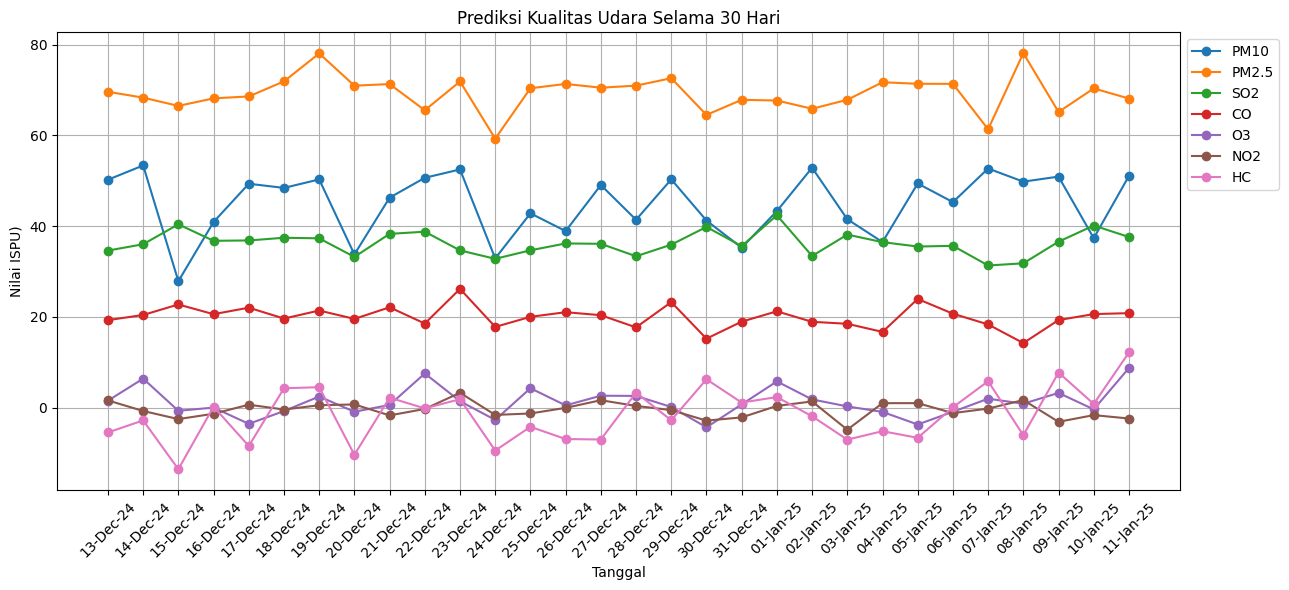

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat line chart untuk PM10, PM2.5, SO2, CO, O3, NO2, HC
plt.plot(df_predicted['Tanggal'], df_predicted['PM10'], label='PM10', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['PM2.5'], label='PM2.5', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['SO2'], label='SO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['CO'], label='CO', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['O3'], label='O3', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['NO2'], label='NO2', marker='o')
plt.plot(df_predicted['Tanggal'], df_predicted['HC'], label='HC', marker='o')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.show()

### **Bar Chart**

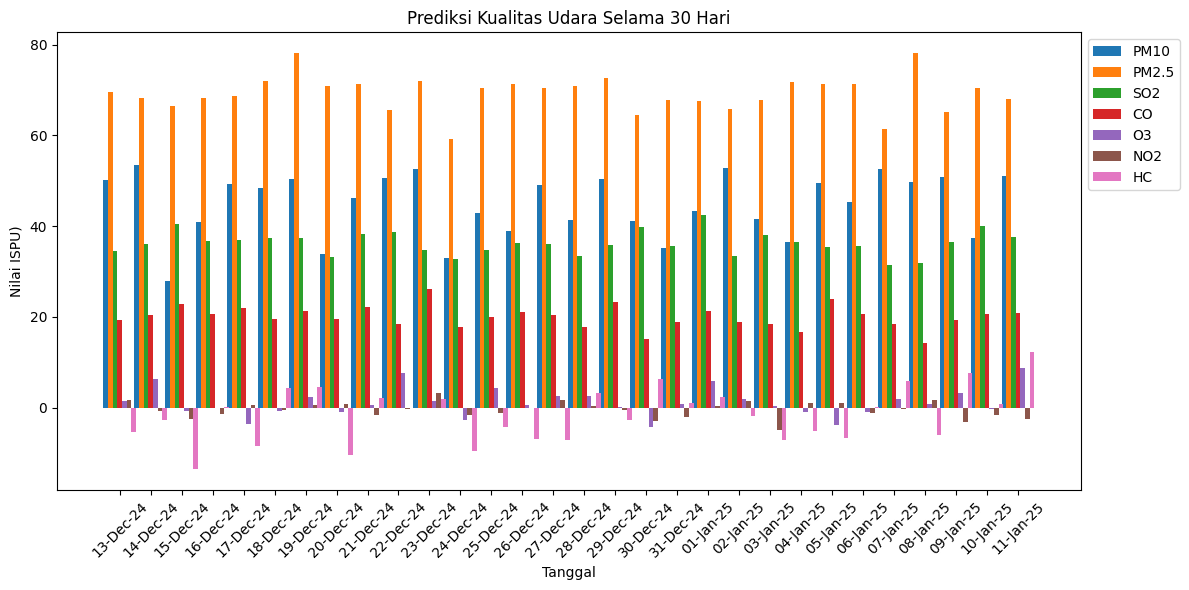

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Menentukan lebar bar
bar_width = 0.15
index = range(len(df_predicted))

# Membuat bar chart untuk setiap parameter
plt.bar(index, df_predicted['PM10'], bar_width, label='PM10')
plt.bar([i + bar_width for i in index], df_predicted['PM2.5'], bar_width, label='PM2.5')
plt.bar([i + 2 * bar_width for i in index], df_predicted['SO2'], bar_width, label='SO2')
plt.bar([i + 3 * bar_width for i in index], df_predicted['CO'], bar_width, label='CO')
plt.bar([i + 4 * bar_width for i in index], df_predicted['O3'], bar_width, label='O3')
plt.bar([i + 5 * bar_width for i in index], df_predicted['NO2'], bar_width, label='NO2')
plt.bar([i + 6 * bar_width for i in index], df_predicted['HC'], bar_width, label='HC')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU)')
plt.xticks([i + 3 * bar_width for i in index], df_predicted['Tanggal'], rotation=45)

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Menampilkan grafik
plt.show()

### **Pie Chart**

In [ ]:
# Menghitung rata-rata untuk setiap parameter
average_values = df_predicted[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'HC']].mean()

# Pastikan tidak ada nilai negatif atau NaN
average_values = average_values[average_values >= 0].dropna()

# Mengatur ukuran grafik
plt.figure(figsize=(6, 6))

# Membuat pie chart
wedges, texts, autotexts = plt.pie(average_values, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Distribusi Parameter yang Mempengaruhi \n Kualitas Udara Selama 30 Hari')

# Menambahkan legenda
plt.legend(wedges, average_values.index, title="Kualitas Udara", loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.axis('equal')
plt.tight_layout()
plt.show()

: 

# **Insight dan rekomendasi Kebijakan pada Data AIR**

In [ ]:
url='https://drive.google.com/file/d/1EFeV1sQ0ZWDYLfzcejBUrmIxSiD0Rm8Y/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df2 = pd.read_csv(url)

In [ ]:
df2.head()

### **Proses Perhitungan Baku Mutu**

In [ ]:
# Hapus kolom yang tidak berguna
df2 = df2.drop(columns=['Kordinat'], errors='ignore')

# Parameter baku mutu Air Badan Air berdasarkan kelas
baku_mutu = {
    1: {'pH_min': 6, 'pH_max': 9, 'DO_min': 6, 'BOD_max': 2, 'COD_max': 10, 'TSS_max': 40, 'Nitrat_max': 10, 'Fosfat_max': 0.2},
    2: {'pH_min': 6, 'pH_max': 9, 'DO_min': 4, 'BOD_max': 3, 'COD_max': 25, 'TSS_max': 50, 'Nitrat_max': 10, 'Fosfat_max': 0.2},
    3: {'pH_min': 6, 'pH_max': 9, 'DO_min': 3, 'BOD_max': 6, 'COD_max': 40, 'TSS_max': 100, 'Nitrat_max': 20, 'Fosfat_max': 1},
    4: {'pH_min': 6, 'pH_max': 9, 'DO_min': 1, 'BOD_max': 12, 'COD_max': 80, 'TSS_max': 400, 'Nitrat_max': 20, 'Fosfat_max': 10000}
}

# Fungsi untuk mengevaluasi kategori kualitas air
def evaluate_quality(row):
    kelas = row['Kelas']
    batas = baku_mutu.get(kelas, {})
    if (row['pH'] < batas['pH_min'] or row['pH'] > batas['pH_max'] or
        row['DO'] < batas['DO_min'] or
        row['BOD'] > batas['BOD_max'] or
        row['COD'] > batas['COD_max'] or
        row['TSS'] > batas['TSS_max'] or
        row['Nitrat'] > batas['Nitrat_max'] or
        row['Fosfat'] > batas['Fosfat_max']):
        return 'Berbahaya'
    return 'Baik'

# Tambahkan kolom kategori kualitas air
df2['Kualitas_Air'] = df2.apply(evaluate_quality, axis=1)

# Hapus spasi yang mungkin ada di nama kolom untuk mencegah eror
df2.columns = df2.columns.str.strip()

# Hitung jumlah untuk kategori 'Baik' dan 'Berbahaya' berdasarkan bulan dan tahun
df2['Tahun'] = pd.to_datetime(df2['Tahun'], format='%Y').dt.year
df2['Bulan'] = df2['Bulan'].astype(str)  # Pastikan bulan dalam format string

# Hitung jumlah untuk masing-masing tahun
jumlah_2023 = df2[df2['Tahun'] == 2023].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0)
jumlah_2024 = df2[df2['Tahun'] == 2024].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0)

### **Line chart air 2023 dan 2024**

In [ ]:
# Pastikan 'Bulan' adalah integer untuk sorting
df2['Bulan'] = df2['Bulan'].astype(int)

# Hitung jumlah untuk masing-masing tahun dan urutkan berdasarkan Bulan
jumlah_2023 = df2[df2['Tahun'] == 2023].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0).sort_index()
jumlah_2024 = df2[df2['Tahun'] == 2024].groupby('Bulan')['Kualitas_Air'].value_counts().unstack(fill_value=0).sort_index()

# Visualisasi line chart untuk bulan dengan kualitas air baik dan berbahaya
plt.figure(figsize=(15, 5))

# Tahun 2023
plt.subplot(1, 2, 1)
plt.plot(jumlah_2023.index, jumlah_2023['Baik'], marker='o', linestyle='-', color='b', label='Memenuhi Baku Mutu')
plt.plot(jumlah_2023.index, jumlah_2023['Berbahaya'], marker='o', linestyle='-', color='r', label='Melebihi Baku Mutu')
plt.title("Jumlah Kualitas Air per Bulan 2023")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(jumlah_2023.index, labels=jumlah_2023.index.astype(str), rotation=45)
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.50, 1))

# Tahun 2024
plt.subplot(1, 2, 2)
plt.plot(jumlah_2024.index, jumlah_2024['Baik'], marker='o', linestyle='-', color='b', label='Memenuhi Baku Mutu')
plt.plot(jumlah_2024.index, jumlah_2024['Berbahaya'], marker='o', linestyle='-', color='r', label='Melebihi Baku Mutu')
plt.title("Jumlah Kualitas Air per Bulan 2024")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(jumlah_2024.index, labels=jumlah_2024.index.astype(str), rotation=45)
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.50, 1))

plt.tight_layout()
plt.show()

In [ ]:
# Hitung total untuk kategori 'Memenuhi Baku Mutu' dan 'Melebihi Baku Mutu' tahun 2023
total_melebihi_2023 = jumlah_2023['Berbahaya'].sum()
total_memenuhi_2023 = jumlah_2023['Baik'].sum()

# Hitung total untuk kategori 'Memenuhi Baku Mutu' dan 'Melebihi Baku Mutu' tahun 2024
total_melebihi_2024 = jumlah_2024['Berbahaya'].sum()
total_memenuhi_2024 = jumlah_2024['Baik'].sum()

# Data untuk pie chart tahun 2023
data_2023 = [total_melebihi_2023, total_memenuhi_2023]
labels_2023 = ['Melebihi Baku Mutu', 'Memenuhi Baku Mutu']
explode_2023 = [0.1] * len(data_2023)

# Data untuk pie chart tahun 2024
data_2024 = [total_melebihi_2024, total_memenuhi_2024]
labels_2024 = ['Melebihi Baku Mutu', 'Memenuhi Baku Mutu']
explode_2024 = [0.1] * len(data_2024)

# Membuat figure dengan dua subplot untuk grafik pie chart
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Pie chart untuk tahun 2023
axes[0].pie(data_2023, autopct='%1.1f%%', startangle=90, explode=explode_2023, colors=['red', 'blue'])
axes[0].set_title("Distribusi Kualitas Air 2023")
axes[0].axis('equal')
axes[0].legend(labels_2023, loc='lower left', title='Kualitas Air')

# Pie chart untuk tahun 2024
axes[1].pie(data_2024, autopct='%1.1f%%', startangle=90, explode=explode_2024, colors=['red', 'blue'])
axes[1].set_title("Distribusi Kualitas Air 2024")
axes[1].axis('equal')
axes[1].legend(labels_2024, loc='lower left', title='Kualitas Air')

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk memberikan solusi berdasarkan parameter yang melebihi baku mutu
def check_exceedances_per_month(df):
    solusi_list = []

    # Kelompokkan data berdasarkan bulan dan tahun
    grouped = df.groupby(['Tahun', 'Bulan'])

    for (tahun, bulan), group in grouped:
        max_exceedance = {
            'parameter': None,
            'value': -1,
            'kelas': None,
            'lokasi': None  # Tambahkan lokasi
        }

        for index, row in group.iterrows():
            kelas = row['Kelas']
            lokasi = row['Lokasi']
            batas = baku_mutu.get(kelas, {})
            current_exceedance = {}

            # Periksa parameter yang melebihi baku mutu
            if row['pH'] < batas.get('pH_min', float('-inf')) or row['pH'] > batas.get('pH_max', float('inf')):
                exceed_value = abs(row['pH'] - (batas['pH_min'] if row['pH'] < batas['pH_min'] else batas['pH_max']))
                current_exceedance['pH'] = exceed_value
            if row['DO'] < batas.get('DO_min', float('-inf')):
                exceed_value = batas['DO_min'] - row['DO']
                current_exceedance['DO'] = exceed_value
            if row['BOD'] > batas.get('BOD_max', float('inf')):
                exceed_value = row['BOD'] - batas['BOD_max']
                current_exceedance['BOD'] = exceed_value
            if row['COD'] > batas.get('COD_max', float('inf')):
                exceed_value = row['COD'] - batas['COD_max']
                current_exceedance['COD'] = exceed_value
            if row['TSS'] > batas.get('TSS_max', float('inf')):
                exceed_value = row['TSS'] - batas['TSS_max']
                current_exceedance['TSS'] = exceed_value
            if row['Nitrat'] > batas.get('Nitrat_max', float('inf')):
                exceed_value = row['Nitrat'] - batas['Nitrat_max']
                current_exceedance['Nitrat'] = exceed_value
            if row['Fosfat'] > batas.get('Fosfat_max', float('inf')):
                exceed_value = row['Fosfat'] - batas['Fosfat_max']
                current_exceedance['Fosfat'] = exceed_value

            # Cek parameter yang melebihi batas maksimum
            for param, exceed_value in current_exceedance.items():
                if exceed_value > max_exceedance['value']:
                    max_exceedance['parameter'] = param
                    max_exceedance['value'] = exceed_value
                    max_exceedance['kelas'] = kelas
                    max_exceedance['lokasi'] = lokasi  # Simpan lokasi

        # Jika ada parameter yang melebihi baku mutu
        if max_exceedance['parameter']:
            solusi = (f"Sungai kelas {max_exceedance['kelas']} di {max_exceedance['lokasi']} tahun {tahun} bulan {bulan}: "
                      f"Parameter {max_exceedance['parameter']} melebihi baku mutu sebesar "
                      f"{max_exceedance['value']:.2f}. "
                      "Perlu tindakan untuk menurunkan status air.")
            solusi_list.append(solusi)

    return solusi_list

# Terapkan fungsi untuk mendapatkan solusi berdasarkan data
solusi_output = check_exceedances_per_month(df2)

# Tampilkan solusi dengan format yang lebih rapi
print("\n".join(solusi_output))


# **Prediksi dan Insight pada data Udara DLH kebonsari dan Wonorejo**

In [ ]:
url='https://drive.google.com/file/d/1dy5sq46ELXtIppaVc6qQrKPHvhpc-hbO/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

### **Preprocessing data**

In [ ]:
# Tabel baku mutu ISPU
baku_mutu = {
    "PM10": [(0, 50, 50), (50, 150, 100), (150, 350, 200), (350, 420, 300), (420, 500, 400)],
    "PM2.5": [(0, 15.5, 50), (15.5, 55.4, 100), (55.4, 150.4, 200), (150.4, 250.4, 300), (250.4, float('inf'), 400)],
    "SO2": [(0, 52, 50), (52, 180, 100), (180, 400, 200), (400, 800, 300), (800, 1200, 400)],
    "CO": [(0, 4000, 50), (4000, 8000, 100), (8000, 15000, 200), (15000, 30000, 300), (30000, 45000, 400)],
    "O3": [(0, 120, 50), (120, 235, 100), (235, 400, 200), (400, 800, 300), (800, 1000, 400)],
    "NO2": [(0, 80, 50), (80, 200, 100), (200, 400, 200), (400, 800, 300), (800, 1000, 400)],
    "HC": [(0, 45, 50), (45, 100, 100), (100, 215, 200), (215, 432, 300), (432, 648, 400)]
}

def calculate_ispu(value, pollutant):
    for lower_bound, upper_bound, ispu_value in baku_mutu[pollutant]:
        if lower_bound <= value < upper_bound:
            xx = value
            ia = ispu_value
            ib = ispu_value - 50  # ISPU untuk batas bawah
            xa = upper_bound
            xb = lower_bound

            ispu = (ia - ib) / (xa - xb) * (xx - xb) + ib
            return round(ispu, 1)
    return None

# Menggunakan DataFrame "data" yang sudah ada
df3 = pd.DataFrame()

# Menambahkan kolom Lokasi dan Tanggal dari "data"
df3['Lokasi'] = data['Lokasi']
df3['X'] = data['X']
df3['Y'] = data['Y']
df3['Tanggal'] = data['Tanggal']

# Mengisi nilai kosong dengan nilai 0
data = data.fillna(0)

# Menghitung ISPU dan menambahkannya ke df3
df3['PM10'] = data['PM10'].apply(lambda x: calculate_ispu(x, 'PM10'))
df3['PM2.5'] = data['PM2.5'].apply(lambda x: calculate_ispu(x, 'PM2.5'))
df3['SO2'] = data['SO2'].apply(lambda x: calculate_ispu(x, 'SO2'))
df3['CO'] = data['CO'].apply(lambda x: calculate_ispu(x, 'CO'))
df3['O3'] = data['O3'].apply(lambda x: calculate_ispu(x, 'O3'))
df3['NO2'] = data['NO2'].apply(lambda x: calculate_ispu(x, 'NO2'))
df3['HC'] = data['HC'].apply(lambda x: calculate_ispu(x, 'HC'))

# Menampilkan DataFrame df3
df3

In [ ]:
# Filter data untuk lokasi 'Wonorejo' dan 'Kebonsari'
df3_filtered = df3[df3['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Menghapus kolom 'PM2.5', 'CO', 'HC', 'X', dan 'Y'
df3_filtered = df3_filtered.drop(columns=['PM2.5', 'CO', 'HC', 'X', 'Y'], errors='ignore')

# Menampilkan hasil akhir
print("Data setelah filtrasi untuk 'Wonorejo' dan 'Kebonsari':")
df3_filtered

### **Menambahkan kolom Kategori**

In [ ]:
# Fungsi untuk menentukan kategori berdasarkan nilai maksimum
def classify_category(row):
    max_value = row[['PM10', 'SO2', 'O3', 'NO2']].max()
    if max_value <= 50:
        return 'baik'
    elif 51 <= max_value <= 100:
        return 'sedang'
    elif 101 <= max_value <= 150:
        return 'tidak sehat'
    elif 151 <= max_value <= 200:
        return 'sangat tidak sehat'
    else:
        return 'berbahaya'

# Tambahkan kolom kategori ke df3_filtered
df3_filtered['Kategori'] = df3_filtered.apply(classify_category, axis=1)

# Simpan hasil ke DataFrame baru
df3_kategori = df3_filtered.copy()

# Tampilkan hasil DataFrame baru
df3_kategori.head()

## **Prediksi udara Kebonsari dan Wonorejo**

In [ ]:
df3_kategori = df3_kategori.copy()

# Pilih variabel independen dan target
X = df3_kategori[['PM10', 'SO2', 'O3', 'NO2']]
y = df3_kategori['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Fungsi untuk membuat prediksi berdasarkan lokasi
def create_predictions(location, last_date):
    start_date = last_date + timedelta(days=1)
    predictions_list = []

    for i in range(30):
        new_date = start_date + timedelta(days=i)
        last_row = df3_kategori.iloc[-1]

        new_row = {
            'PM10': np.random.normal(last_row['PM10'], 10),
            'SO2': np.random.normal(last_row['SO2'], 2),
            'O3': np.random.normal(last_row['O3'], 3),
            'NO2': np.random.normal(last_row['NO2'], 2),
        }
        predictions_list.append(new_row)

    df_future = pd.DataFrame(predictions_list)
    X_future_scaled = scaler.transform(df_future)
    predictions = knn.predict(X_future_scaled)

    df_predicted = pd.DataFrame({
        'Lokasi': location,
        'Tanggal': [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(30)],
        'PM10': df_future['PM10'],
        'SO2': df_future['SO2'],
        'O3': df_future['O3'],
        'NO2': df_future['NO2'],
        'kategori': predictions
    })

    return df_predicted

# Ambil tanggal terakhir dari data (12 Desember 2024)
last_date = pd.to_datetime("12-Dec-24", format='%d-%b-%y')

# Buat prediksi untuk Wonorejo
df_predicted_Wonorejo = create_predictions('Wonorejo', last_date)

# Buat prediksi untuk Kebonsari
df_predicted_Kebonsari = create_predictions('Kebonsari', last_date)

In [ ]:
df3_kategori = df3_kategori.copy()

# Pilih variabel independen dan target
X = df3_kategori[['PM10', 'SO2', 'O3', 'NO2']]
y = df3_kategori['Kategori']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalisasi data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Mengaktifkan fungsi klasifikasi KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Fungsi untuk membuat prediksi berdasarkan lokasi
def create_predictions(location):
    last_date = pd.to_datetime(df3_kategori['Tanggal'].max(), format='%d-%b-%y')
    start_date = last_date + timedelta(days=1)
    predictions_list = []

    for i in range(30):
        new_date = start_date + timedelta(days=i)
        last_row = df3_kategori.iloc[-1]

        new_row = {
            'PM10': np.random.normal(last_row['PM10'], 10),
            'SO2': np.random.normal(last_row['SO2'], 2),
            'O3': np.random.normal(last_row['O3'], 3),
            'NO2': np.random.normal(last_row['NO2'], 2),
        }
        predictions_list.append(new_row)

    df_future = pd.DataFrame(predictions_list)
    X_future_scaled = scaler.transform(df_future)
    predictions = knn.predict(X_future_scaled)

    df_predicted = pd.DataFrame({
        'Lokasi': location,
        'Tanggal': [(start_date + timedelta(days=i)).strftime('%d-%b-%y') for i in range(30)],
        'PM10': df_future['PM10'],
        'SO2': df_future['SO2'],
        'O3': df_future['O3'],
        'NO2': df_future['NO2'],
        'kategori': predictions
    })

    return df_predicted

### **Penentuan Nilai K**

In [ ]:
# Menyimpan akurasi untuk setiap nilai k
k_range = range(1, 21)
accuracies = []

# Menghitung akurasi untuk nilai k yang berbeda
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot akurasi untuk setiap nilai k
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.show()

### **Menampilkan data frame**

In [ ]:
df_predicted_Wonorejo.head()

In [ ]:
df_predicted_Kebonsari.head()

### **Nilai Klasifikasi**

In [ ]:
# Tampilkan classification report untuk Wonorejo
print("Classification Report untuk Wonorejo:")
print(classification_report(y_test, knn.predict(X_test), zero_division=0))


# Tampilkan classification report untuk Kebonsari
print("\nClassification Report untuk Kebonsari:")
print(classification_report(y_test, knn.predict(X_test), zero_division=0))

### **Visualisasi Line chart Prediksi udara Wonorejo**

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat line chart untuk PM10, SO2, O3, dan NO2
plt.plot(df_predicted_Wonorejo['Tanggal'], df_predicted_Wonorejo['PM10'], label='PM10', marker='o')
plt.plot(df_predicted_Wonorejo['Tanggal'], df_predicted_Wonorejo['SO2'], label='SO2', marker='o')
plt.plot(df_predicted_Wonorejo['Tanggal'], df_predicted_Wonorejo['O3'], label='O3', marker='o')
plt.plot(df_predicted_Wonorejo['Tanggal'], df_predicted_Wonorejo['NO2'], label='NO2', marker='o')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara di Wonorejo Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.show()

### **Visualisasi Line Chart Prediksi Udara Kebonsari**

In [ ]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat line chart untuk PM10, SO2, O3, dan NO2
plt.plot(df_predicted_Kebonsari['Tanggal'], df_predicted_Kebonsari['PM10'], label='PM10', marker='o')
plt.plot(df_predicted_Kebonsari['Tanggal'], df_predicted_Kebonsari['SO2'], label='SO2', marker='o')
plt.plot(df_predicted_Kebonsari['Tanggal'], df_predicted_Kebonsari['O3'], label='O3', marker='o')
plt.plot(df_predicted_Kebonsari['Tanggal'], df_predicted_Kebonsari['NO2'], label='NO2', marker='o')

# Menambahkan judul dan label
plt.title('Prediksi Kualitas Udara di Kebonsari Selama 30 Hari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Menempatkan legenda di luar grafik
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Menampilkan grafik
plt.show()

### **Visualisasi Pie Chart**

In [ ]:
# Menghitung rata-rata parameter untuk Kebonsari
avg_kebonsari = df_predicted_Kebonsari[['PM10', 'SO2', 'O3', 'NO2']].mean()

# Menghitung rata-rata parameter untuk Wonorejo
avg_wonorejo = df_predicted_Wonorejo[['PM10', 'SO2', 'O3', 'NO2']].mean()

# Memastikan tidak ada nilai negatif atau NaN
avg_kebonsari = avg_kebonsari.clip(lower=0)
avg_wonorejo = avg_wonorejo.clip(lower=0)

# Menyiapkan data untuk pie chart
labels = ['PM10', 'SO2', 'O3', 'NO2']
sizes_kebonsari = avg_kebonsari.values
sizes_wonorejo = avg_wonorejo.values

# Membuat subplot untuk pie chart
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart untuk Kebonsari
axs[0].pie(sizes_kebonsari, autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')
axs[0].set_title('Distribusi Parameter yang Mempengaruhi \n Kualitas Udara Kebonsari')
axs[0].legend(labels, title='Polutan', loc='lower right', bbox_to_anchor=(1, 0), frameon=False)

# Pie chart untuk Wonorejo
axs[1].pie(sizes_wonorejo, autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title('Distribusi Parameter yang Mempengaruhi \n Kualitas Udara Wonorejo')
axs[1].legend(labels, title='Polutan', loc='lower right', bbox_to_anchor=(1, 0), frameon=False)

# Menampilkan grafik
plt.tight_layout()
plt.show()

## **Insight Data udara 2019 - 2024**

In [ ]:
# Mengubah kolom 'Tanggal' menjadi datetime
df3_filtered['Tanggal'] = pd.to_datetime(df3_filtered['Tanggal'], errors='coerce')

# Mengelompokkan data berdasarkan tahun dan lokasi, kemudian menghitung rata-rata
df3_filtered['Tahun'] = df3_filtered['Tanggal'].dt.year
avg_pollutants_yearly = df3_filtered.groupby(['Tahun', 'Lokasi'])[['PM10', 'SO2', 'O3', 'NO2']].mean().reset_index()

# Mengubah format data untuk plotting
avg_pollutants_pivot = avg_pollutants_yearly.pivot(index='Tahun', columns='Lokasi', values=['PM10', 'SO2', 'O3', 'NO2'])

# Membuat Bar Chart
plt.figure(figsize=(12, 8))
avg_pollutants_pivot.plot(kind='bar', figsize=(10, 8))
plt.title('Rata-rata Kualitas Udara Tahunan di Wonorejo dan Kebonsari (2019-2024)')
plt.xlabel('Tahun')
plt.ylabel('Nilai ISPU')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Polutan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Visualisasi Grafik Piechart kualitas udara 2019 - 2024**

In [ ]:
# Menghapus spasi di sekitar nama lokasi (jika belum dilakukan)
df3_filtered['Lokasi'] = df3_filtered['Lokasi'].str.strip()

# Menghitung rata-rata untuk setiap polutan berdasarkan lokasi
avg_pollutants = df3_filtered.groupby('Lokasi')[['PM10', 'SO2', 'O3', 'NO2']].mean()

# Membuat subplots untuk Pie Charts
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Pie Chart untuk Kebonsari
axs[0].pie(avg_pollutants.loc['Kebonsari'], autopct='%1.1f%%', startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].set_title('Distribusi Parameter yang Mempengaruhi \n Kualitas Udara Kebonsari')
axs[0].legend(avg_pollutants.columns, title='Polutan', loc='lower right', bbox_to_anchor=(1, 0), frameon=False)

# Pie Chart untuk Wonorejo
axs[1].pie(avg_pollutants.loc['Wonorejo'], autopct='%1.1f%%', startangle=90)
axs[1].axis('equal')
axs[1].set_title('Distribusi Parameter yang Mempengaruhi \n Kualitas Udara Wonorejo')
axs[1].legend(avg_pollutants.columns, title='Polutan', loc='lower right', bbox_to_anchor=(1, 0), frameon=False)

plt.tight_layout()
plt.show()

### **Grafik line chart Tren kualitas udara Kebonsari dan Wonorejo**

In [ ]:
# Memfilter data untuk lokasi 'Wonorejo' dan 'Kebonsari'
filtered_data = df3_filtered[df3_filtered['Lokasi'].isin(['Wonorejo', 'Kebonsari'])]

# Mengubah kolom 'Tanggal' menjadi datetime dengan inferensi format
filtered_data['Tanggal'] = pd.to_datetime(filtered_data['Tanggal'], errors='coerce')

# Menghapus baris dengan nilai NaN di kolom yang ingin dihitung rata-ratanya
filtered_data = filtered_data.dropna(subset=['PM10', 'SO2', 'O3', 'NO2'])

# Mengelompokkan data berdasarkan tanggal dan lokasi, kemudian menghitung rata-rata
daily_avg = filtered_data.groupby(['Tanggal', 'Lokasi'])[['PM10', 'SO2', 'O3', 'NO2']].mean().reset_index()

In [ ]:
# Fungsi untuk mendapatkan rentang tanggal dari input
def get_date_range():
    tahun_awal = int(input("Tahun Awal: "))
    bulan_awal = input("Bulan Awal (misal: januari, februari, ...): ").lower()
    tanggal_awal = int(input("Tanggal Awal: "))

    tahun_akhir = int(input("Tahun Akhir: "))
    bulan_akhir = input("Bulan Akhir (misal: januari, februari, ...): ").lower()
    tanggal_akhir = int(input("Tanggal Akhir: "))

    # Mengubah nama bulan menjadi angka
    bulan_mapping = {
        'januari': 1, 'februari': 2, 'maret': 3, 'april': 4,
        'mei': 5, 'juni': 6, 'juli': 7, 'agustus': 8,
        'september': 9, 'oktober': 10, 'november': 11, 'desember': 12
    }

    start_date = pd.Timestamp(year=tahun_awal, month=bulan_mapping[bulan_awal], day=tanggal_awal)
    end_date = pd.Timestamp(year=tahun_akhir, month=bulan_mapping[bulan_akhir], day=tanggal_akhir)

    return start_date, end_date

# Mendapatkan rentang tanggal dari input user
start_date, end_date = get_date_range()

# Membuat Line Chart untuk Kebonsari
plt.figure(figsize=(12, 6))
kebonsari_data = daily_avg[(daily_avg['Lokasi'] == 'Kebonsari') &
                            (daily_avg['Tanggal'] >= start_date) &
                            (daily_avg['Tanggal'] <= end_date)]

plt.plot(kebonsari_data['Tanggal'], kebonsari_data['PM10'], label='PM10', color='blue')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['SO2'], label='SO2', color='orange')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['O3'], label='O3', color='green')
plt.plot(kebonsari_data['Tanggal'], kebonsari_data['NO2'], label='NO2', color='red')
plt.title('Tren Kualitas Udara di Kebonsari')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [ ]:
# Fungsi untuk mendapatkan rentang tanggal dari input
def get_date_range():
    tahun_awal = int(input("Tahun Awal: "))
    bulan_awal = input("Bulan Awal (misal: januari, februari, ...): ").lower()
    tanggal_awal = int(input("Tanggal Awal: "))

    tahun_akhir = int(input("Tahun Akhir: "))
    bulan_akhir = input("Bulan Akhir (misal: januari, februari, ...): ").lower()
    tanggal_akhir = int(input("Tanggal Akhir: "))

    # Mengubah nama bulan menjadi angka
    bulan_mapping = {
        'januari': 1, 'februari': 2, 'maret': 3, 'april': 4,
        'mei': 5, 'juni': 6, 'juli': 7, 'agustus': 8,
        'september': 9, 'oktober': 10, 'november': 11, 'desember': 12
    }

    start_date = pd.Timestamp(year=tahun_awal, month=bulan_mapping[bulan_awal], day=tanggal_awal)
    end_date = pd.Timestamp(year=tahun_akhir, month=bulan_mapping[bulan_akhir], day=tanggal_akhir)

    return start_date, end_date

# Mendapatkan rentang tanggal dari input user
start_date, end_date = get_date_range()

# Membuat Line Chart untuk Wonorejo
plt.figure(figsize=(12, 6))
wonorejo_data = daily_avg[(daily_avg['Lokasi'] == 'Wonorejo') &
                           (daily_avg['Tanggal'] >= start_date) &
                           (daily_avg['Tanggal'] <= end_date)]

plt.plot(wonorejo_data['Tanggal'], wonorejo_data['PM10'], label='PM10', color='blue')
plt.plot(wonorejo_data['Tanggal'], wonorejo_data['SO2'], label='SO2', color='orange')
plt.plot(wonorejo_data['Tanggal'], wonorejo_data['O3'], label='O3', color='green')
plt.plot(wonorejo_data['Tanggal'], wonorejo_data['NO2'], label='NO2', color='red')

plt.title('Tren Kualitas Udara di Wonorejo')
plt.xlabel('Tanggal')
plt.ylabel('Nilai ISPU')
plt.grid()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()